# Project 2: New Cases Prediction [COVID-19 Indonesia Dataset] 

## 1. Data Preparation

### 1.1 Import Libraries

Import beberapa library yang dibutuhkan

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### 1.2 Import Dataset 

Import dataset yang akan digunakan, lalu tampilkan dataset untuk mengecek apakah import berhasil atau tidak

In [4]:
df = pd.read_csv('./dataset/covid_19_indonesia_time_series_all.csv')
df = df.set_index('Location')

In [5]:
df.head()

,Date,Location ISO Code,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,...,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
Location,,,,,,,,,,,,,,,,,,,,,
DKI Jakarta,3/1/2020,ID-JK,2,0,0,2,489,35,39,415,...,106.836118,-6.204699,0.18,45.09,0.0,3.23,7.16%,7.98%,NaN,NaN
DKI Jakarta,3/2/2020,ID-JK,2,0,0,2,491,35,39,417,...,106.836118,-6.204699,0.18,45.27,0.0,3.23,7.13%,7.94%,1.0,1.0
Indonesia,3/2/2020,IDN,2,0,0,2,2,0,0,2,...,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00%,0.00%,NaN,NaN
Jawa Barat,3/2/2020,ID-JB,3,0,0,3,12,10,624,-622,...,107.603708,-6.920432,0.07,0.27,0.0,0.22,83.33%,5200.00%,NaN,NaN
Riau,3/2/2020,ID-RI,1,0,0,1,2,2,8,-8,...,101.805109,0.511648,0.16,0.33,0.0,0.33,100.00%,400.00%,NaN,NaN


## 2. Exploratory Data Analysis (EDA)

Menganalisa karakteristik data dengan perintah `info()`, `describe()`, `shape`, dan beberapa perintah lainnya agar menemukan insight yang dapat berguna dalam pengolahan data dan perancangan model machine learning. Lalu, mencatat segala macam penemuan pada dataset seperti data yang kosong, tidak lengkap, redundant, atau data yang perlu pengolahan lebih lanjut. Hal-hal yang sudah dicatat tersebut akan diolah dan dieksekusi pada tahapan Data Preprocessing.

In [8]:
# Melihat jumlah tipe data tiap kolom dalam dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13014 entries, DKI Jakarta to Sumatera Utara
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         13014 non-null  object 
 1   Location ISO Code            13014 non-null  object 
 2   New Cases                    13014 non-null  int64  
 3   New Deaths                   13014 non-null  int64  
 4   New Recovered                13014 non-null  int64  
 5   New Active Cases             13014 non-null  int64  
 6   Total Cases                  13014 non-null  int64  
 7   Total Deaths                 13014 non-null  int64  
 8   Total Recovered              13014 non-null  int64  
 9   Total Active Cases           13014 non-null  int64  
 10  Location Level               13014 non-null  object 
 11  City or Regency              0 non-null      float64
 12  Province                     12622 non-null  object 
 13  Co

Dataset memiliki 37 feature/kolom, terdiri dari 12 kolom dengan tipe data katagorikal dan 25 kolom dengan tipe data numerikal.

In [10]:
# Melihat summary statistics
df.describe()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,Total Regencies,...,Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Growth Factor of New Cases,Growth Factor of New Deaths
count,13014.000000,13014.000000,13014.000000,13014.000000,1.301400e+04,13014.000000,1.301400e+04,13014.000000,0.0,13014.000000,...,1.301400e+04,13014.000000,13014.000000,13014.000000,13014.000000,13014.000000,13014.000000,13014.000000,12071.000000,11367.000000
mean,229.870678,6.159521,204.068465,19.642692,2.496575e+04,769.013370,2.047353e+04,3723.197710,NaN,24.407331,...,1.567663e+07,756.893061,113.664259,-2.733003,16.141075,1790.045239,0.367225,45.664902,1.455591,1.045951
std,925.079589,23.731329,849.104101,260.967245,1.106131e+05,3161.067362,9.398453e+04,14538.525964,NaN,69.394459,...,4.526533e+07,2773.772723,9.861775,3.600992,30.807969,3163.520044,0.818305,64.553927,3.308223,1.629915
min,0.000000,0.000000,0.000000,-5003.000000,1.000000e+00,0.000000,0.000000e+00,-1195.000000,NaN,1.000000,...,6.484070e+05,8.590000,96.910522,-8.682205,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,1.000000,-6.000000,3.710000e+02,11.000000,2.310000e+02,97.250000,NaN,7.000000,...,1.999539e+06,47.790000,106.109004,-6.204699,1.140000,100.070000,0.000000,3.080000,0.590000,0.670000
50%,29.000000,0.000000,17.000000,2.000000,3.160500e+03,88.000000,2.077000e+03,607.000000,NaN,11.000000,...,4.216171e+06,103.840000,113.417654,-2.461746,6.330000,738.260000,0.000000,22.740000,1.000000,1.000000
75%,98.000000,3.000000,81.000000,25.000000,1.064200e+04,362.000000,8.122750e+03,1924.500000,NaN,18.000000,...,9.095591e+06,262.700000,121.201093,0.212037,17.617500,2313.972500,0.490000,65.647500,1.330000,1.000000
max,14518.000000,476.000000,13038.000000,5279.000000,1.496085e+06,40449.000000,1.331400e+06,176672.000000,NaN,416.000000,...,2.651855e+08,16334.310000,138.696030,4.225615,428.740000,35007.000000,36.960000,582.330000,120.500000,102.000000


In [13]:
# Melihat dimensi (baris, kolom) dataset
df.shape

(13014, 36)

### 2.1 Menentukan Kolom yang Akan diimputasi

Melihat data null tiap kolom dalam bentuk presentase beserta tipe datanya

In [14]:
columns = list(df.columns)

for col in columns:
  print(f"{col}:{round((df[col].isnull().sum() / len(df) * 100), 3)}%\t\t{df[col].dtype}")

Date:0.0%		object
Location ISO Code:0.0%		object
New Cases:0.0%		int64
New Deaths:0.0%		int64
New Recovered:0.0%		int64
New Active Cases:0.0%		int64
Total Cases:0.0%		int64
Total Deaths:0.0%		int64
Total Recovered:0.0%		int64
Total Active Cases:0.0%		int64
Location Level:0.0%		object
City or Regency:100.0%		float64
Province:3.012%		object
Country:0.0%		object
Continent:0.0%		object
Island:3.012%		object
Time Zone:3.012%		object
Special Status:85.569%		object
Total Regencies:0.0%		int64
Total Cities:2.812%		float64
Total Districts:0.0%		int64
Total Urban Villages:2.828%		float64
Total Rural Villages:3.02%		float64
Area (km2):0.0%		int64
Population:0.0%		int64
Population Density:0.0%		float64
Longitude:0.0%		float64
Latitude:0.0%		float64
New Cases per Million:0.0%		float64
Total Cases per Million:0.0%		float64
New Deaths per Million:0.0%		float64
Total Deaths per Million:0.0%		float64
Case Fatality Rate:0.0%		object
Case Recovered Rate:0.0%		object
Growth Factor of New Cases:7.246%		flo

Membuat looping untuk memfilter setiap kolom dalam dataset dan mengelompokannya ke dalam beberapa list untuk menentukan kolom mana saja yang akan diimputasi (kolom yang memiliki jumlah data null < 40%) dan kolom mana yang harus di drop (kolom yang memiliki jumlah data null > 40%) nantinya.

- `cols_null_num` untuk kolom yang memiliki jumlah data null < 40% dan bertipe data numerik
- `cols_null_obj` untuk kolom yang memiliki jumlah data null < 40% dan bertipe data kategori dan memiliki 
- `cols_drop` untuk kolom yang memiliki jumlah data null > 40%

In [15]:
cols_null_num = []
cols_null_obj = []
cols_drop = []

for col in columns:
  if ((df[col].isnull().sum() / len(df) * 100) != 0) and ((df[col].isnull().sum() / len(df) * 100) < 40) and (df[col].dtype != 'object'):
    cols_null_num.append(col)
  elif ((df[col].isnull().sum() / len(df) * 100) != 0) and ((df[col].isnull().sum() / len(df) * 100) < 40) and (df[col].dtype == 'object'):
    cols_null_obj.append(col)
  elif ((df[col].isnull().sum() / len(df) * 100) != 0) and ((df[col].isnull().sum() / len(df) * 100) > 40):
    cols_drop.append(col)

In [20]:
print(f"Kolom numerik: {cols_null_num}")
print(f"Kolom kategori: {cols_null_obj}")

Kolom numerik: ['Total Cities', 'Total Urban Villages', 'Total Rural Villages', 'Growth Factor of New Cases', 'Growth Factor of New Deaths']
Kolom kategori: ['Province', 'Island', 'Time Zone']


Kolom yang akan diimputasi:

- Kolom numerik: 'Total Cities', 'Total Urban Villages', 'Total Rural Villages', 'Growth Factor of New Cases', 'Growth Factor of New Deaths'
- Kolom kategori: 'Province', 'Island', 'Time Zone'

#### 2.1.1 Melihat Distribusi Data Untuk Menetukan Nilai Imputasi Tiap Kolom

- Kolom Numerik 

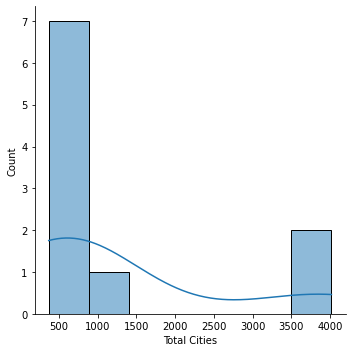

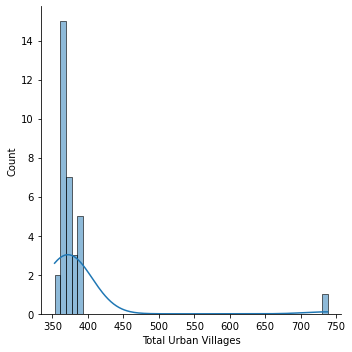

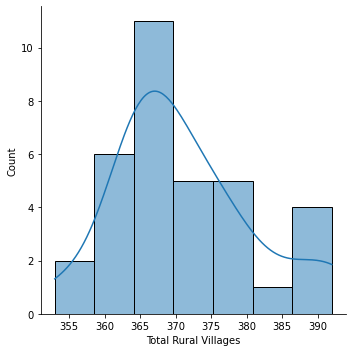

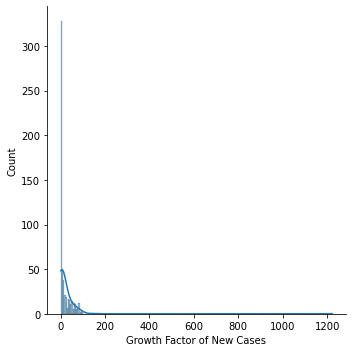

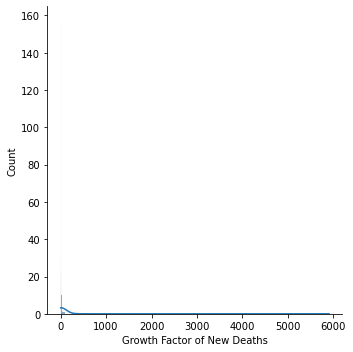

In [21]:
for col in cols_null_num:
  sns.displot(df[col].value_counts(), kde=True)

Kita dapat menetukan nilai yang akan mengganti nilai kosong berdasarkan distribusi data tiap feature. Untuk 'Total Rural Villages' memiliiki data berdistrbusi 'nyaris' normal, nilai modus merupakan pilihan tepat karena data yang bernilai bulat, mengapa tidak mean? karena nilai mean tidak terlalu bisa mewakili distribusi data yang tidak benar-benar normal/merata.

Untuk kolom numerik lain seperti 'Total Cities', 'Total Urban Villages', 'Growth Factor of New Cases', dan 'Growth Factor of New Deaths' memiliki data yang sama sekali tidak merata, sehingga nilai median merupakan nilai yang cocok untuk dapat mengisi data null si setiap feature-nya.

- Kolom Kategori

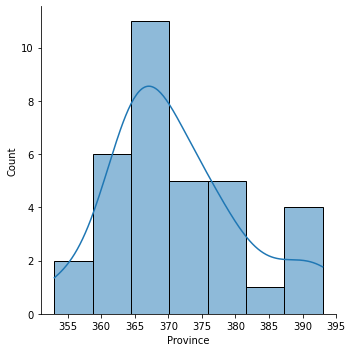

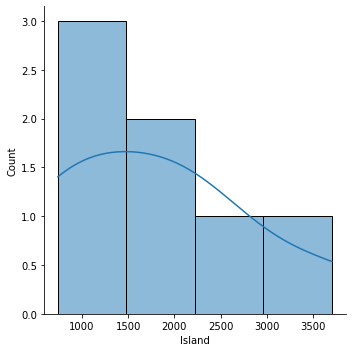

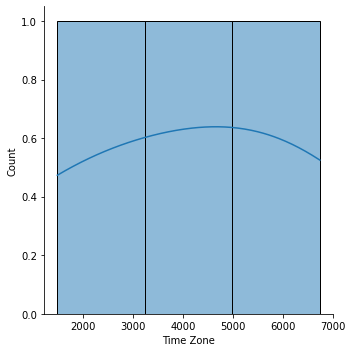

In [22]:
for col in cols_null_obj:
  sns.displot(df[col].value_counts(), kde=True)

Data null pada 'Province', 'Island', dan 'Time Zone' kurang baik jika diisi dengan modus data karena tidak bisa merepresentasikan data kolom terkait seperti provinsi atau pulau saat kasus COVID-19 ditemukan tidak akan dapat direpresentasikan dengan nama provinsi atau pulau yang paling banyak datanya.

Namun solusi drop kolom juga kurang baik karena data null memiliki komposisi yang sedikit. Yang akan dilakukan adalah mengisi nilai null tersebut dengan angka nol, meskipun nilai nol tersebut diisi pada kolom kategori, namun pada akhirnya kolom tersebut juga akan diubah ke dalam bentuk numerik sehingga pengisian nilai nol tidak akan bermasalah.

### 2.2 Menentukan Kolom yang Akan di Drop

In [23]:
cols_drop

['City or Regency', 'Special Status']

Kolom yang akan di drop adalah kolom yang memiliki komposisi data null yang banyak (sekitar lebih dari 40% keseluruhan data kolom tersebut). Seluruh data kolom 'City or Regency' adalah null, sedangkan untuk kolom 'Special Status' memiliki 85.569% data null.

## 3. Data Preprocessing 

Beberapa hal yang didapatkan dari proses EDA adalah:
- Handling Missing Value:
  
  - Imputasi: 
      
      - 'Total Rural Villages' -> mod
      - 'Total Urban Villages' -> median
      - 'Total Cities' -> median
      - 'Growth Factor of New Cases' -> median 
      - 'Growth Factor of New Deaths' -> median
      - 'Province' -> 0 
      - 'Island' -> 0
      - 'Time Zone' -> 0
  
  - Drop Feature:

    - 'City or Regency'
    - 'Special Status'

- Mengubah Kolom Kategori Menjadi Numerik

### 3.1 Imputasi 

#### 3.1.1 Imputasi Kolom Numerik

In [25]:
# Membuat dictionary untuk menampung nilai pengisi
filler_num = {
    'Total Rural Villages': stats.mode(df['Total Rural Villages'])[0][0],
    'Total Urban Villages': df['Total Urban Villages'].median(),
    'Total Cities': df['Total Cities'].median(),
    'Growth Factor of New Cases': df['Growth Factor of New Cases'].median(),
    'Growth Factor of New Deaths': df['Growth Factor of New Deaths'].median()
}

In [26]:
df.fillna(filler_num, inplace=True)

#### 3.1.2 Imputasi Kolom Kategorik

Mengisi data null di kolom 'Province', 'Island', 'Time Zone' dengan nilai nol

In [27]:
df[cols_null_obj] = df[cols_null_obj].replace([np.inf, -np.inf], np.nan)
df[cols_null_obj] = df[cols_null_obj].fillna(0)

### 3.2 Drop Kolom

Drop feature 'City or Regency' dan 'Special Status'

In [28]:
df.drop(columns=cols_drop, inplace=True)

Mengecek perubahan yang dilakukan

In [29]:
df.isnull().sum()

Date                           0
Location ISO Code              0
New Cases                      0
New Deaths                     0
New Recovered                  0
New Active Cases               0
Total Cases                    0
Total Deaths                   0
Total Recovered                0
Total Active Cases             0
Location Level                 0
Province                       0
Country                        0
Continent                      0
Island                         0
Time Zone                      0
Total Regencies                0
Total Cities                   0
Total Districts                0
Total Urban Villages           0
Total Rural Villages           0
Area (km2)                     0
Population                     0
Population Density             0
Longitude                      0
Latitude                       0
New Cases per Million          0
Total Cases per Million        0
New Deaths per Million         0
Total Deaths per Million       0
Case Fatal

### 3.3 Ubah Tipe Data Kolom Kategori Menjadi Numerik 

*Dataset memiliki 37 feature/kolom, terdiri dari 12 kolom dengan tipe data katagorikal dan 25 kolom dengan tipe data numerikal*

Disini kita akan menggunakan teknik Label Encoding. Meskipun hampir semua kolom kategorik dalam dataset tidak bersifat ordinal, namun jumlah kolom kategorik terlalu banyak sehingga akan terbentuk lebih banyak kolom saat kita melakukan Encoding dengan One-Hot Encoding yang tentu tidak efisien untuk dataset. Dengan pertimbangan tersebut, Label Encoding merupakan pilihan yang cocok.

In [31]:
# Membuat fungsi untuk mengubah tipe data kolom dengan metode Label Encoding
le = LabelEncoder()

def label_encoder(df):
  for col in df.columns:
    if df.dtypes[col] == 'object':
      le.fit(df[col].astype(str))
      df[col] = le.transform(df[col].astype(str))
  return df

In [32]:
# Terapkan fungsi pada dataset, lalu cek tipe data tiap kolom untuk melihat perubahannya
df = label_encoder(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13014 entries, DKI Jakarta to Sumatera Utara
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         13014 non-null  int32  
 1   Location ISO Code            13014 non-null  int32  
 2   New Cases                    13014 non-null  int64  
 3   New Deaths                   13014 non-null  int64  
 4   New Recovered                13014 non-null  int64  
 5   New Active Cases             13014 non-null  int64  
 6   Total Cases                  13014 non-null  int64  
 7   Total Deaths                 13014 non-null  int64  
 8   Total Recovered              13014 non-null  int64  
 9   Total Active Cases           13014 non-null  int64  
 10  Location Level               13014 non-null  int32  
 11  Province                     13014 non-null  int32  
 12  Country                      13014 non-null  int32  
 13  Co

## 4. Modeling

Membuat model machine learning yang akan memprediksi angka 'New Cases' dengan metode Decision Tree

### 4.1 Splitting Data 

Melakukan splitting data dengan fungsi `train_test_split()` dari library Scikit-learn

In [33]:
X = df.drop(columns=['New Cases'])
y = df['New Cases']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [34]:
print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (11712, 33)
y train: (11712,)
X test: (1302, 33)
y test: (1302,)


### 4.2 Training Model

In [35]:
model_dt = DecisionTreeClassifier().fit(X_train, y_train)

In [36]:
# cek akurasi
score_model_dt= model_dt.score(X_test, y_test)
print(f"Akurasi Decision Tree Model:\t{round(score_model_dt * 100, 3)}%")

Akurasi Decision Tree Model:	49.309%


## 5 Model Evaluation 

### 5.1 Improve Model with Feature Scaling

#### 5.1.1 Melakukan feature scaling / normalisasi data dengan fungsi `MinMaxScaler()` dari library Skicit-learn

In [37]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
# Ubah data yang telah dinormalisasi ke dalam bentuk Dataframe
pd.DataFrame(X_train_scaled, columns=X_train.columns)

,Date,Location ISO Code,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,...,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,0.349490,0.352941,0.029412,0.038656,0.475491,0.035364,0.031126,0.032931,0.050600,1.0,...,0.468055,0.707793,0.265266,0.425471,0.106602,0.608641,0.341017,0.769572,0.008299,0.011471
1,0.522959,0.117647,0.002101,0.000844,0.486578,0.020197,0.013251,0.017027,0.046136,1.0,...,0.220136,0.172412,0.002612,0.080502,0.002435,0.085845,0.106518,0.638736,0.007635,0.000784
2,0.204082,0.352941,0.018908,0.009511,0.495137,0.012640,0.014215,0.012117,0.019110,1.0,...,0.468055,0.707793,0.145123,0.152085,0.068452,0.277970,0.442766,0.811646,0.009710,0.088235
3,0.403061,0.558824,0.000000,0.000000,0.486676,0.002772,0.002843,0.002639,0.009636,1.0,...,0.732995,0.689058,0.001773,0.090602,0.000000,0.150997,0.372019,0.801527,0.008299,0.000000
4,0.834184,0.264706,0.010504,0.021936,0.483077,0.008187,0.016292,0.005688,0.029308,1.0,...,0.237537,0.191938,0.054835,0.032263,0.012446,0.104339,0.655803,0.436535,0.009710,0.009804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11707,0.173469,0.441176,0.000000,0.001227,0.489885,0.003325,0.004153,0.003144,0.010215,1.0,...,0.395044,0.548483,0.045365,0.055302,0.000000,0.112239,0.469793,0.791763,0.011535,0.000000
11708,0.734694,0.617647,0.000000,0.000077,0.486481,0.000074,0.000049,0.000052,0.006949,1.0,...,0.590677,0.000000,0.000000,0.000591,0.000000,0.000635,0.108108,0.433872,0.008299,0.009804
11709,0.928571,0.558824,0.002101,0.000000,0.486578,0.001277,0.001755,0.001205,0.008045,1.0,...,0.732995,0.689058,0.001773,0.041741,0.020563,0.093229,0.496820,0.788567,0.000830,0.004902
11710,0.030612,0.941176,0.004202,0.006903,0.485411,0.013287,0.017751,0.012899,0.017890,1.0,...,0.051248,0.842443,0.012548,0.038175,0.003517,0.082891,0.488076,0.830463,0.008548,0.019608


#### 5.1.2 Melakukan Pemodelan Kembali dengan Data yang Sudah di Normalisasi

In [39]:
model_dt = DecisionTreeClassifier().fit(X_train_scaled, y_train)

In [40]:
score_scaled_model_dt = model_dt.score(X_test_scaled, y_test)
print(f"Akurasi Decision Tree Model yang Sudah di Normalisasi:\t{round(score_scaled_model_dt * 100, 3)}%")

Akurasi Decision Tree Model yang Sudah di Normalisasi:	50.307%


## 6. Predict Test Data

### 6.1 Melakukan Prediksi Dengan Data Test

In [41]:
Y_predict = model_dt.predict(X_test_scaled)

In [42]:
Y_predict

array([  4, 153,  20, ...,  48,  68, 319], dtype=int64)

### 6.2 Mengubah Data Hasil Prediksi ke dalam Bentuk Dataframe

In [43]:
new_cases_prediction = pd.DataFrame({'New Cases': Y_predict})

In [44]:
new_cases_prediction.head(10)

,New Cases
0,4
1,153
2,20
3,0
4,0
5,28
6,9
7,10
8,29
9,55


### 6.3 Eksport DataFrame ke dalam bentuk file csv

In [45]:
filename = 'new_cases_prediction.csv'

new_cases_prediction.to_csv(filename, index=False)
print(f"File '{filename}' has been exported")

File 'new_cases_prediction.csv' has been exported
